PROJETO ESTATÍSTICA:

Discente: Paulo Tiago Andrade Pereira

Professor: Fabio Henrique Pereira

Essa atividade tem como objetivo avaliar a distribuição da Glicose em pacientes saudáveis e com diabetes

In [ ]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Att_IA/diabetes.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df.rename(columns={
    'Outcome':'Diabetes'
}, inplace=True)

In [ ]:
# Removendo possiveis outliers com glicose = 0
df = df.loc[df.Glucose > 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


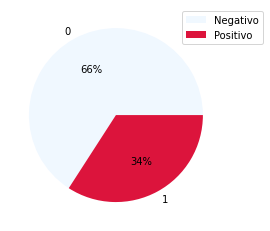

In [ ]:
x = df['Diabetes'].value_counts()
plt.pie(x,
        labels=x.index,
        autopct='%1.f%%',
        colors=['aliceblue', 'crimson']
        )
plt.legend(fontsize=10,
           labels=['Negativo', 'Positivo'],
           loc = 'upper right',
           bbox_to_anchor =(1, 1, .2, 0)
           )

Analisando a glicose dos pacientes e realizando o teste de aderência Shapiro Wilk à fim de verificar se a amostra possui distribuição normal.

Text(0.5, 1.0, 'Nivel de glicose de todos os pacientes')

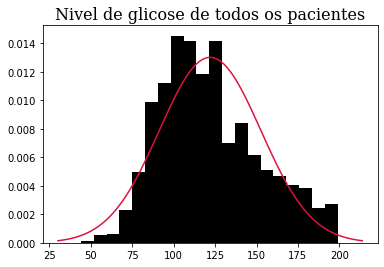

In [ ]:
plt.hist(df['Glucose'], density=True, bins=20, color='black')
m = np.mean(df['Glucose'])
o = np.std(df['Glucose'])
y = np.linspace(m - 3*o, m + 3*o, 100)
plt.plot(y, stats.norm.pdf(y, m, o), color='crimson')
plt.title('Nivel de glicose de todos os pacientes',
          fontdict={'family': 'serif',
                    'color':  'black',
                    'weight': 'normal',
                    'size': 16
                    })

In [ ]:
print(stats.shapiro(df['Glucose']))
print('O P-value é inferior à 0,05. O que indica que a distribuição não é normal')

ShapiroResult(statistic=0.9696927666664124, pvalue=4.754196336841518e-20)
O P-value é inferior à 0,05. O que indica que a distribuição não é normal


Text(0.5, 1.0, 'Nivel de glicose entre os pacientes saudáveis')

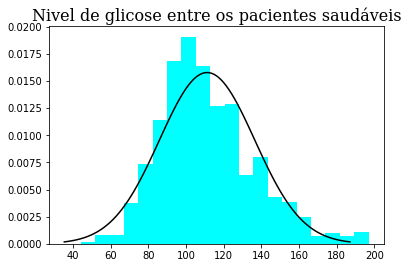

In [ ]:
Amostra1 = df.loc[df.Diabetes == 0]
Amostra1 = Amostra1['Glucose']
m = np.mean(Amostra1)
o = np.std(Amostra1)
y = np.linspace(m - 3*o, m + 3*o, 100)
plt.hist(Amostra1, density=True, bins=20, color='#00FFFF')
plt.plot(y, stats.norm.pdf(y, m, o), color='black')
plt.title('Nivel de glicose entre os pacientes saudáveis',
          fontdict={'family': 'serif',
                    'color':  'black',
                    'weight': 'normal',
                    'size': 16
                    })

In [ ]:
print(stats.shapiro(Amostra1))
print('O P-value é inferior à 0,05. O que indica que a distribuição não é normal')

ShapiroResult(statistic=0.9710512161254883, pvalue=1.570886128154144e-15)
O P-value é inferior à 0,05. O que indica que a distribuição não é normal


Text(0.5, 1.0, 'Nivel de glicose entre os diabéticos')

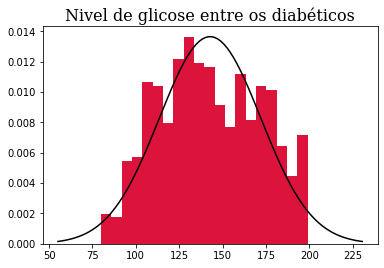

In [ ]:
Amostra2 = df.loc[df.Diabetes == 1]
Amostra2 = Amostra2['Glucose']
m = np.mean(Amostra2)
o = np.std(Amostra2)
y = np.linspace(m - 3*o, m + 3*o, 100)
plt.hist(Amostra2, density=True, bins=20, color='crimson')
plt.plot(y, stats.norm.pdf(y, m, o), color='black')
plt.title('Nivel de glicose entre os diabéticos',
          fontdict={'family': 'serif',
                    'color':  'black',
                    'weight': 'normal',
                    'size': 16
                    })

In [ ]:
print(stats.shapiro(Amostra2))
print('O P-value é inferior à 0,05. O que indica que a distribuição não é normal')

ShapiroResult(statistic=0.97465980052948, pvalue=1.912937586112662e-09)
O P-value é inferior à 0,05. O que indica que a distribuição não é normal


Segundo o teste de Shapiro Wilk as 3 amostras acima NÃO seguem distribuição normal, pois o P-Value é < 0,05.

✈

***Tentando utilizar o Teorema do Limite Central para, à partir da amostra original, obter uma amostra com distribuição normal.***

Text(0.5, 1.0, 'Nivel de glicose de todos os pacientes')

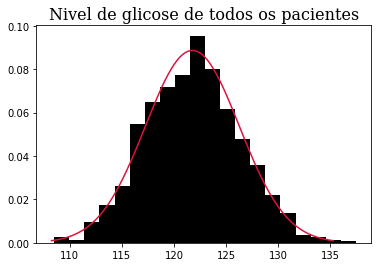

In [ ]:
# selecionando 1000 médias de 50 valores aleatórios
x = []
for i in range(1000):
    i = np.mean(df['Glucose'].sample(50))
    x.append(i)

plt.hist(x, density=True, bins=20, color='black')
m = np.mean(x)
o = np.std(x)
y = np.linspace(m - 3*o, m + 3*o, 100)
plt.plot(y, stats.norm.pdf(y, m, o), color='crimson')
plt.title('Nivel de glicose de todos os pacientes',
          fontdict={'family': 'serif',
                    'color':  'black',
                    'weight': 'normal',
                    'size': 16
                    })

In [ ]:
print(stats.shapiro(x))

ShapiroResult(statistic=0.9986411929130554, pvalue=0.6488279104232788)


Text(0.5, 1.0, 'Nivel de glicose entre os pacientes saudáveis')

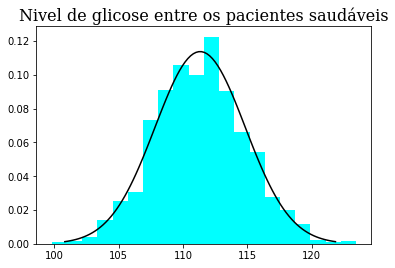

In [ ]:
x2 = []
for i in range(1000):
    i = np.mean(Amostra1.sample(50))
    x2.append(i)

m = np.mean(x2)
o = np.std(x2)
y = np.linspace(m - 3*o, m + 3*o, 100)
plt.hist(x2, density=True, bins=20, color='#00FFFF')
plt.plot(y, stats.norm.pdf(y, m, o), color='black')
plt.title('Nivel de glicose entre os pacientes saudáveis',
          fontdict={'family': 'serif',
                    'color':  'black',
                    'weight': 'normal',
                    'size': 16
                    })

In [ ]:
print(stats.shapiro(x2))

ShapiroResult(statistic=0.9989261031150818, pvalue=0.8327003717422485)


Estimando com 95% de confiança o nivel médio de Glicose entre as pessoas saudáveis.

In [ ]:
print( f'O nível médio de Glicose das pessoas saudáveis está entre: {stats.t.interval(0.95, len(x2)-1, m, o/np.sqrt(len(x2)))}' )

O nível médio de Glicose das pessoas saudáveis está entre: (111.10342200706246, 111.53861799293752)


Text(0.5, 1.0, 'Nivel de glicose entre os diabéticos')

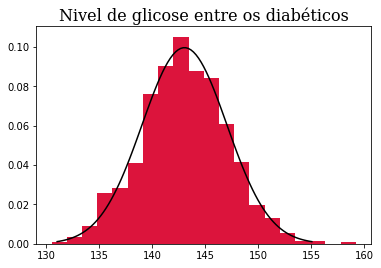

In [ ]:
x3 = []
for i in range(1000):
    i = np.mean(Amostra2.sample(50))
    x3.append(i)

m = np.mean(x3)
o = np.std(x3)
y = np.linspace(m - 3*o, m + 3*o, 100)
plt.hist(x3, density=True, bins=20, color='crimson')
plt.plot(y, stats.norm.pdf(y, m, o), color='black')
plt.title('Nivel de glicose entre os diabéticos',
          fontdict={'family': 'serif',
                    'color':  'black',
                    'weight': 'normal',
                    'size': 16
                    })

In [ ]:
print(stats.shapiro(x3))

ShapiroResult(statistic=0.9982755184173584, pvalue=0.41762396693229675)


E por fim, estimando com 95% de confiança o nível médio de Glicose presente entre as pessoas que testaram positivo para Diabetes.

In [ ]:
print( f'O nível médio de Glicose das pessoas diabéticas está no intervalo: {stats.t.interval(0.95, len(x3)-1, m, o/np.sqrt(len(x3)))}' )

O nível médio de Glicose das pessoas diabéticas está no intervalo: (142.78578640874937, 143.28253359125065)
